{'n_frames': 146, 'time': [1715906608.8547916, 1715906609.1747396, 1715906609.3207877, 1715906609.4856353, 1715906609.646035, 1715906609.8241954, 1715906610.1270206, 1715906610.2994492, 1715906610.5060308, 1715906610.67041, 1715906610.8298202, 1715906610.9972954, 1715906611.1751578, 1715906611.3421378, 1715906611.4925354, 1715906612.1882951, 1715906617.7521188, 1715906619.719984, 1715906619.8988078, 1715906620.164297, 1715906630.1857522, 1715906630.2892213, 1715906630.6183712, 1715906630.8745725, 1715906631.0232863, 1715906631.1891518, 1715906631.4578748, 1715906631.6316135, 1715906631.7944837, 1715906631.9749494, 1715906632.1249914, 1715906632.3026018, 1715906632.4604406, 1715906632.627591, 1715906632.7821317, 1715906632.9458203, 1715906633.1154683, 1715906633.2684553, 1715906633.432258, 1715906633.608861, 1715906633.7635005, 1715906633.9333591, 1715906634.116328], 'n_success': 43, 'n_fail': 146, 'distance_vec': [69.42106184614624, 69.54961936808355, 69.54961936808355, 69.806734411958

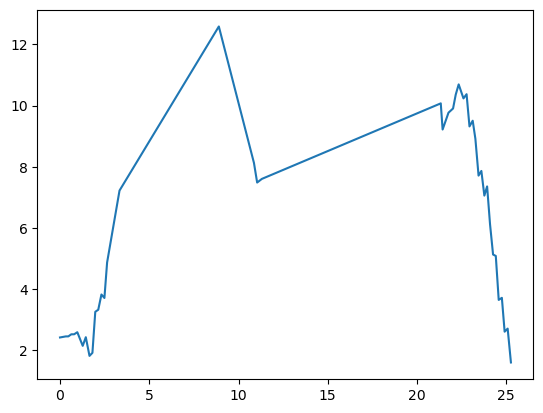

In [111]:
# open a picke file and print the content
import pickle
import sys
import numpy as np

path = f'/home/amir/Documents/Robotics Project/Experiments/Exp5/'

filename = path + 'eval_1243.pkl'

with open(filename, "rb") as f:
    data = pickle.load(f)

print(data)

time = np.array(data['time'])
time = time - time[0]
vel = data['velocity']
ang = data['angular_velocity']

import matplotlib.pyplot as plt
plt.plot(time, vel)

print(data['total_distance_travelled']*4)

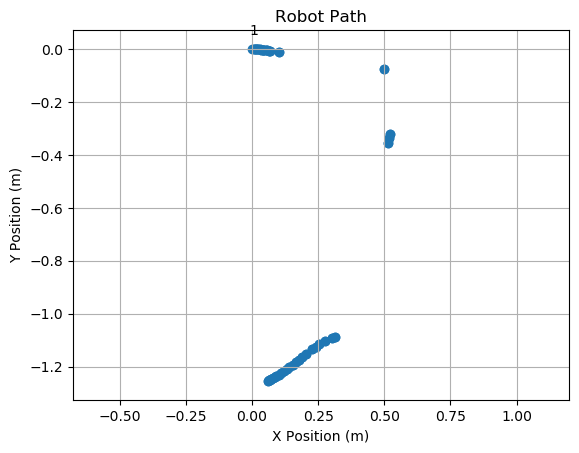

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Sample data
# Time vector (in seconds)

# Linear velocity vector (in meters per second)
linear_velocity = np.array(vel)

# Angular velocity vector (in radians per second)
angular_velocity = np.array(ang) * math.pi / 4


# Linear velocity vector (in centimeters per second)

# Convert linear velocity to meters per second
linear_velocity = linear_velocity / 100
# Initial position and orientation
x = [0]
y = [0]
theta = [0]

# Time step
dt = np.diff(time)

# Calculate the path
for i in range(1, len(time)):
    # Update orientation
    theta.append(theta[i-1] + angular_velocity[i-1] * dt[i-1])
    
    # Update position
    x.append(x[i-1] + linear_velocity[i-1] * np.cos(theta[i-1]) * dt[i-1])
    y.append(y[i-1] + linear_velocity[i-1] * np.sin(theta[i-1]) * dt[i-1])

# Plot the path
# plt.figure()
# plt.plot(x, y, marker='o')
# plt.title('Robot Path')
# plt.xlabel('X Position (m)')
# plt.ylabel('Y Position (m)')
# plt.grid(True)
# plt.axis('equal')
# plt.show()

for i in range(1, len(time)):
    # Update orientation
    theta.append(theta[i-1] + angular_velocity[i-1] * dt[i-1])
    
    # Update position
    x.append(x[i-1] + linear_velocity[i-1] * np.cos(theta[i-1]) * dt[i-1])
    y.append(y[i-1] + linear_velocity[i-1] * np.sin(theta[i-1]) * dt[i-1])

# Plot the path
plt.figure()
plt.scatter(x, y, marker='o')
plt.title('Robot Path')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.grid(True)
plt.axis('equal')

# Annotate each point with the step number
for i in [1]:
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [ ]:
import pickle
import sys
import numpy as np
import os
import matplotlib.pyplot as plt



for exp in range(1, 6):
    path = f'Exp{exp}/'
    
    # import all the pickle files in the folder
    filenames = os.listdir(path)
    data = []
    for filename in filenames:
        with open(path + filename, "rb") as f:
            data.append(pickle.load(f))

    
    plt.figure()
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        vel = data[i]['velocity']
        #calculate the travelled distance from the velocity
        # integrate the velocity to get the distance
        distance = np.trapz(vel, time)
        ang = data[i]['angular_velocity']
        ang_distance = np.trapz(ang, time)

        # plot the data in different figures
        plt.subplot(2, 1, 1)
        plt.plot(time, vel)
        plt.title('Velocity')
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (cm/s)')
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(time, ang)
        plt.title('Angular Velocity')
        plt.xlabel('Time (s)')
        plt.ylabel('Angular Velocity (rad/s)')
        plt.grid(True)

        plt.show()




In [36]:
print(data[0].keys())

vel = data[0]['velocity']
time = np.array(data[0]['time'])
time = time - time[0]

len(vel), time.shape

distance = cumulative_trapezoid(vel, time, initial=0)
distance

dict_keys(['n_frames', 'time', 'n_success', 'n_fail', 'distance_vec', 'angle_error_vec', 'total_distance_travelled', 'velocity', 'angular_velocity'])


array([ 0.        ,  1.70886802,  2.93452674,  4.12547694,  5.351657  ,
        6.52852646,  7.69698094,  9.08979034, 10.15661818, 11.28865508,
       12.30109104, 13.13996241, 13.91500003, 14.53063691, 15.43494916,
       16.31007209, 16.93448914, 17.47025524, 17.84745111, 18.20335095,
       18.46271373])

In [ ]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# Define font size
label_fontsize = 20

for exp in range(1, 6):
    path = f'Exp{exp}/'
    
    # Import all the pickle files in the folder
    filenames = os.listdir(path)
    data = []
    for filename in filenames:
        with open(path + filename, "rb") as f:
            data.append(pickle.load(f))
    
    
    # Create figures for velocity and angular velocity
    plt.figure(figsize=(10, 5))
    plt.title(f'Experiment {exp} - Velocity', fontsize=label_fontsize)
    plt.xlabel('Time (s)', fontsize=label_fontsize)
    plt.ylabel('Velocity (cm/s)', fontsize=label_fontsize)
    plt.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        vel = data[i]['velocity']

        # Plot velocity data in the velocity figure
        plt.plot(time, vel, label=f'Run {i+1}')
    
    # Save plot
    plt.savefig(f'Exp{exp}_velocity.svg')
    # Add legend and show the velocity plot
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title(f'Experiment {exp} - Angular Velocity', fontsize=label_fontsize)
    plt.xlabel('Time (s)', fontsize=label_fontsize)
    plt.ylabel('Angular Velocity (rad/s)', fontsize=label_fontsize)
    plt.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        ang = data[i]['angular_velocity']

        # Plot angular velocity data in the angular velocity figure
        plt.plot(time, ang, label=f'Run {i+1}')
    
    # Save plot
    plt.savefig(f'Exp{exp}_angular_velocity.svg')
    # Add legend and show the angular velocity plot
    plt.legend()
    plt.show()


    # Distance travelled
    plt.figure(figsize=(10, 5))
    plt.title(f'Experiment {exp} - Distance traveled', fontsize=label_fontsize)
    plt.xlabel('Time (s)', fontsize=label_fontsize)
    plt.ylabel('Distance (cm)', fontsize=label_fontsize)
    plt.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        vel = data[i]['velocity']
        # Calculate the travelled distance from the velocity
        distance = cumulative_trapezoid(vel, time, initial=0)

        # Plot distance data in the distance figure
        plt.plot(time, distance, label=f'Run {i+1}')
    
    # Save plot
    plt.savefig(f'Exp{exp}_distance.svg')
    # Add legend and show the distance plot
    plt.legend()
    plt.show()


    # Distance from object
    plt.figure(figsize=(10, 5))
    plt.title(f'Experiment {exp} - Distance to object', fontsize=label_fontsize)
    plt.xlabel('Time (s)', fontsize=label_fontsize)
    plt.ylabel('Distance (cm)', fontsize=label_fontsize)
    plt.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        dist_error = data[i]['distance_vec']
        plt.plot(time, dist_error, label=f'Run {i+1}')
    
    # Save plot
    plt.savefig(f'Exp{exp}_distance_error.svg')
    # Add legend and show the distance error plot
    plt.legend()
    plt.show()


    # Angle error
    plt.figure(figsize=(10, 5))
    plt.title(f'Experiment {exp} - Angle error', fontsize=label_fontsize)
    plt.xlabel('Time (s)', fontsize=label_fontsize)
    plt.ylabel('Angle error (rad)', fontsize=label_fontsize)
    plt.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        angle_error = data[i]['angle_error_vec']
        plt.plot(time, angle_error, label=f'Run {i+1}')
    
    # Save plot
    plt.savefig(f'Exp{exp}_angle_error.svg')
    # Add legend and show the angle error plot
    plt.legend()
    plt.show()


In [ ]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# Define font size
label_fontsize = 20

for exp in range(1, 6):
    path = f'Exp{exp}/'
    
    # Import all the pickle files in the folder
    filenames = os.listdir(path)
    data = []
    for filename in filenames:
        with open(path + filename, "rb") as f:
            data.append(pickle.load(f))
    
    # Create a single figure to contain all subplots
    fig, axs = plt.subplots(3, 2, figsize=(20, 15))
    fig.suptitle(f'Experiment {exp}', fontsize=label_fontsize)

    # Plot Velocity
    ax = axs[0, 0]
    ax.set_title('Velocity', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Velocity (cm/s)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        vel = data[i]['velocity']
        ax.plot(time, vel, label=f'Run {i+1}')
    ax.legend()

    # Plot Angular Velocity
    ax = axs[0, 1]
    ax.set_title('Angular Velocity', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Angular Velocity (rad/s)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        ang = data[i]['angular_velocity']
        ax.plot(time, ang, label=f'Run {i+1}')
    ax.legend()

    # # Plot Distance traveled
    # ax = axs[1, 0]
    # ax.set_title('Distance traveled', fontsize=label_fontsize)
    # ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    # ax.set_ylabel('Distance (cm)', fontsize=label_fontsize)
    # ax.grid(True)
    
    # for i in range(len(data)):
    #     time = np.array(data[i]['time'])
    #     time = time - time[0]
    #     vel = data[i]['velocity']
    #     distance = cumulative_trapezoid(vel, time, initial=0)
    #     ax.plot(time, distance, label=f'Run {i+1}')
    # ax.legend()

    # Plot Distance from object
    ax = axs[1, 0]
    ax.set_title('Distance to object', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Distance (cm)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        dist_error = data[i]['distance_vec']
        ax.plot(time, dist_error, label=f'Run {i+1}')
    ax.legend()

    # Plot Angle error
    ax = axs[1, 1]
    ax.set_title('Angle error', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Angle error (rad)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        angle_error = data[i]['angle_error_vec']
        ax.plot(time, angle_error, label=f'Run {i+1}')
    ax.legend()

    # Turn off the unused subplot
    axs[2, 0].axis('off')
    axs[2, 1].axis('off')
    

    # Save the combined plot as an SVG file
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'Exp{exp}_combined.svg')
    plt.show()


In [ ]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# Define font size
label_fontsize = 20

for exp in range(1, 6):
    path = f'Exp{exp}/'
    
    # Import all the pickle files in the folder
    filenames = os.listdir(path)
    data = []
    for filename in filenames:
        with open(path + filename, "rb") as f:
            data.append(pickle.load(f))
    
    # Create a single figure to contain all subplots in a 2x2 grid
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'Experiment {exp}', fontsize=label_fontsize)

    # Plot Velocity
    ax = axs[0, 0]
    ax.set_title('Velocity', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Velocity (cm/s)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        vel = data[i]['velocity']
        ax.plot(time, vel, label=f'Run {i+1}')
    ax.legend()

    # Plot Angular Velocity
    ax = axs[0, 1]
    ax.set_title('Angular Velocity', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Angular Velocity (rad/s)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        ang = data[i]['angular_velocity']
        ax.plot(time, ang, label=f'Run {i+1}')
    ax.legend()

    # Plot Distance from object
    ax = axs[1, 0]
    ax.set_title('Distance to object', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Distance (cm)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        dist_error = data[i]['distance_vec']
        ax.plot(time, dist_error, label=f'Run {i+1}')
    ax.legend()

    # Plot Angle error
    ax = axs[1, 1]
    ax.set_title('Angle error', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Angle error (rad)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        angle_error = data[i]['angle_error_vec']
        ax.plot(time, angle_error, label=f'Run {i+1}')
    ax.legend()

    # Save the combined plot as an SVG file
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'Exp{exp}_combined.svg')
    plt.show()


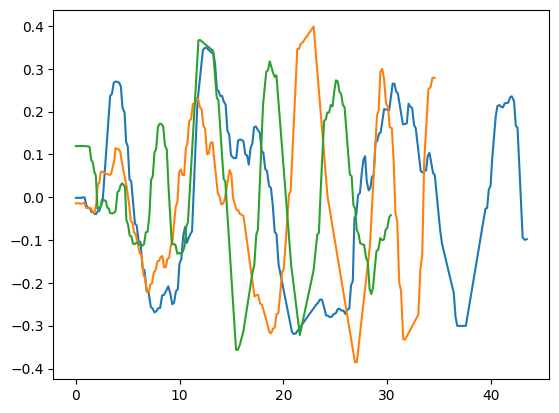

In [2]:
import pickle
import sys
import numpy as np
import os
path = f'Exp6/'


# import all the pickle files in the folder

filenames = os.listdir(path)
data = []
for filename in filenames:
    with open(path + filename, "rb") as f:
        data.append(pickle.load(f))


filename1 = path + 'eval_5702.pkl'
filename2 = path + 'eval_7525.pkl'
filename3 = path + 'eval_9866.pkl'
with open(filename1, "rb") as f:
    data1 = pickle.load(f)
with open(filename2, "rb") as f:
    data2 = pickle.load(f)
with open(filename3, "rb") as f:
    data3 = pickle.load(f)

time1 = np.array(data1['time'])
time1 = time1 - time1[0]
time2 = np.array(data2['time'])
time2 = time2 - time2[0]
time3 = np.array(data3['time'])
time3 = time3 - time3[0]
distance_vec1 = (np.array(data1['distance_vec']) - 65) / 100
distance_vec2 = (np.array(data2['distance_vec']) - 65) / 100
distance_vec3 = (np.array(data3['distance_vec']) - 65) / 100
ang1 = data1['angle_error_vec']
ang2 = data2['angle_error_vec']
ang3 = data3['angle_error_vec']

import matplotlib.pyplot as plt
# plt.plot(time1, distance_vec1)
# plt.plot(time2, distance_vec2)
# plt.plot(time3, distance_vec3)
# plt.savefig('exp_6_dis.png')
# plt.show()
plt.plot(time1, ang1)
plt.plot(time2, ang2)
plt.plot(time3, ang3)
plt.savefig('exp_6_ang.svg')
# plt.show()

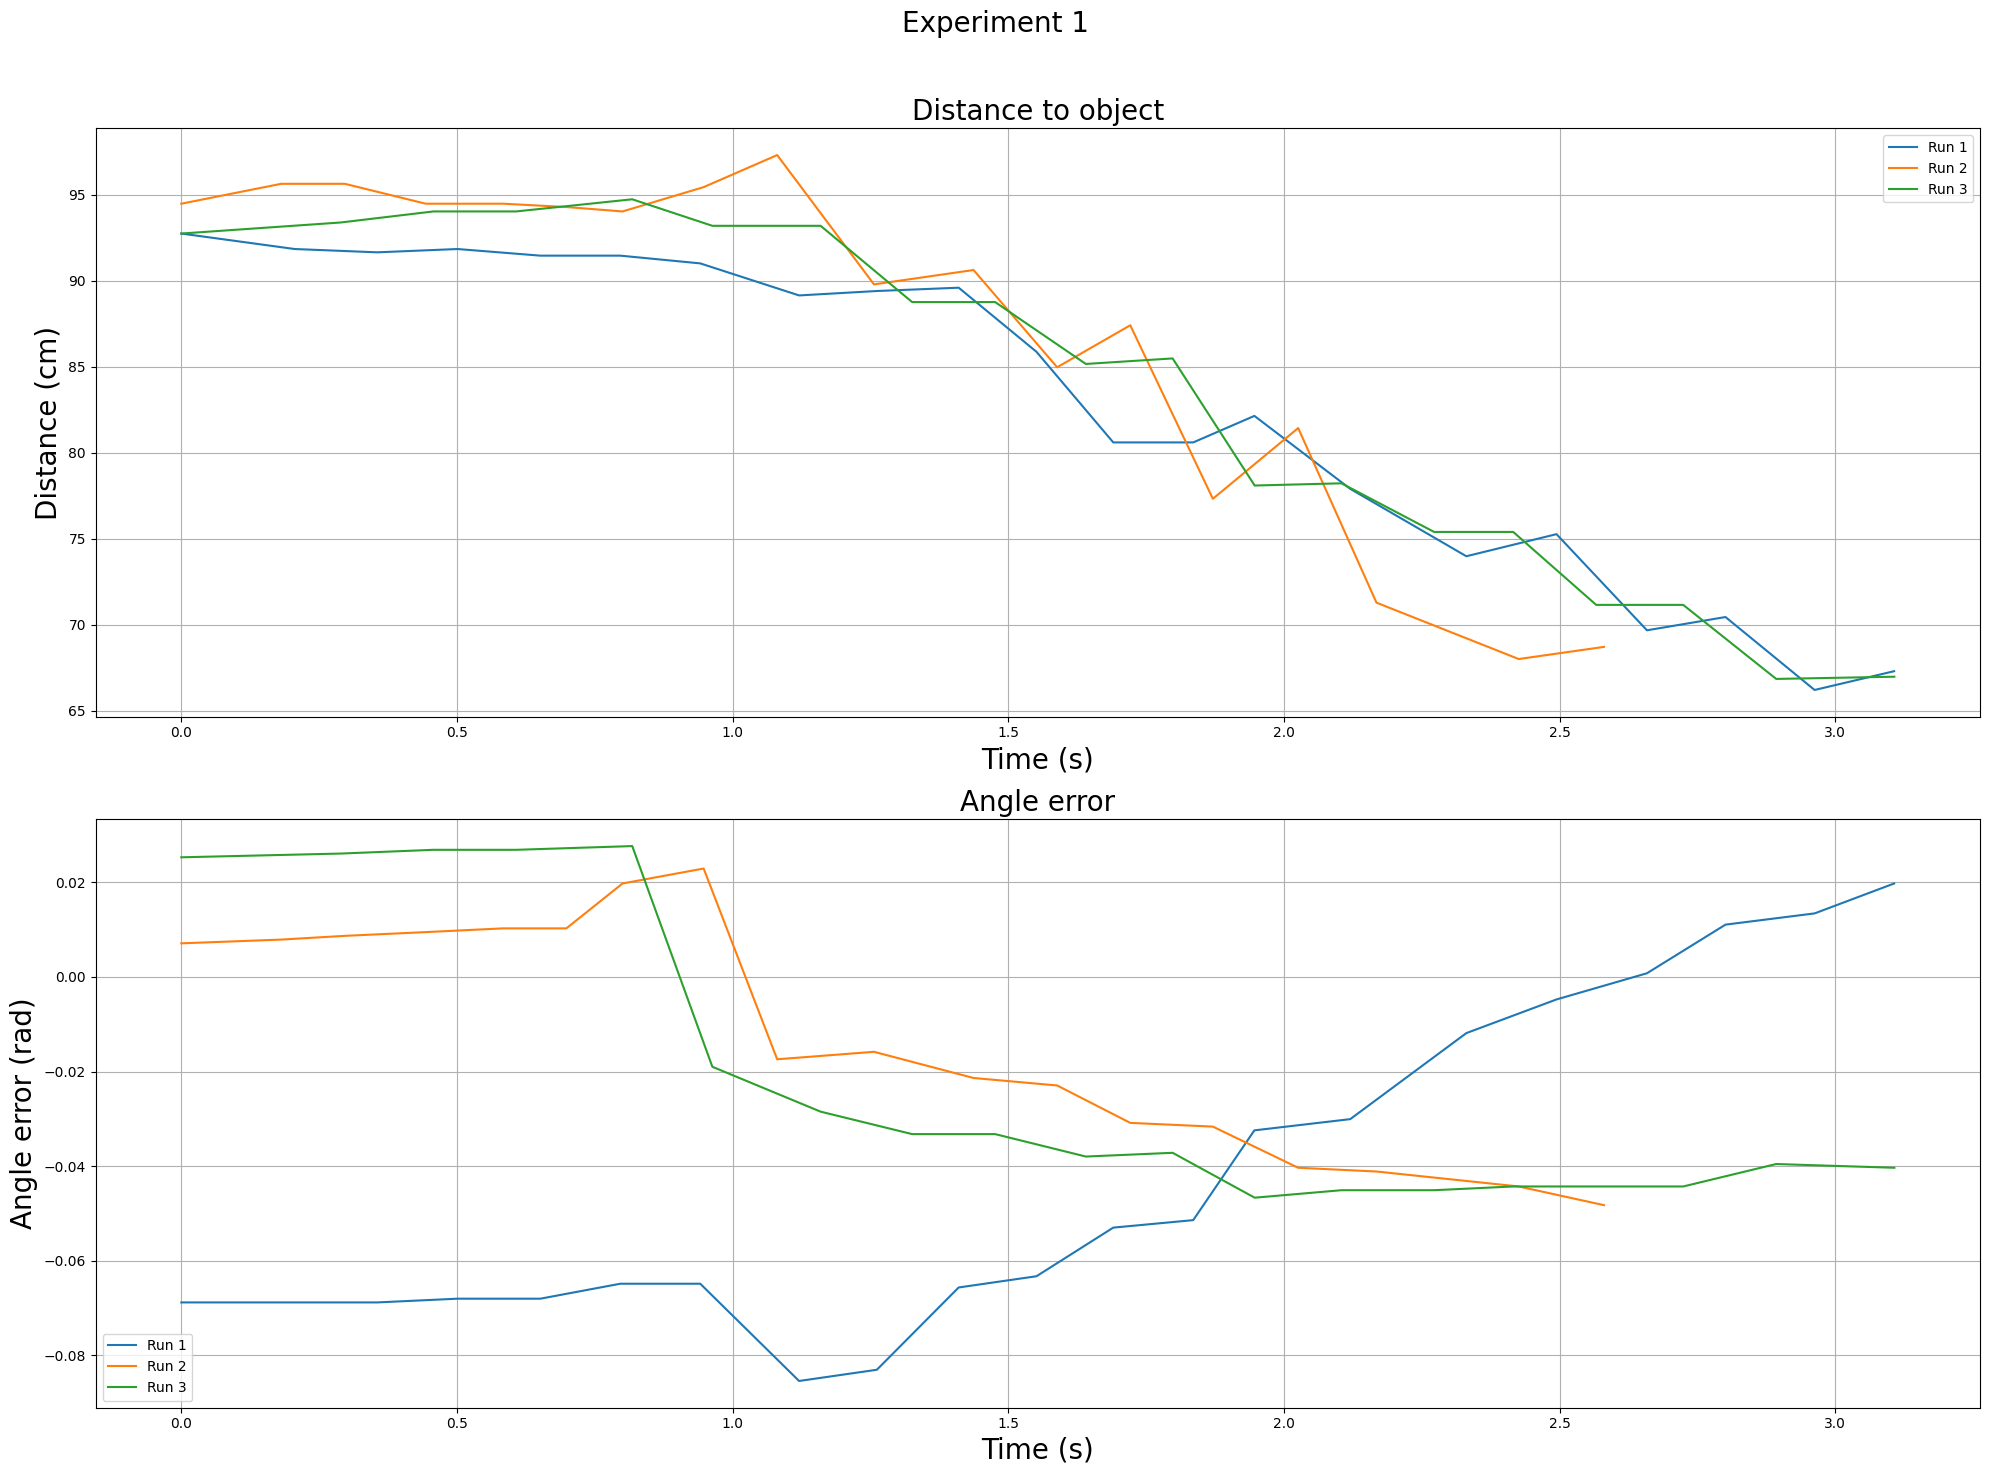

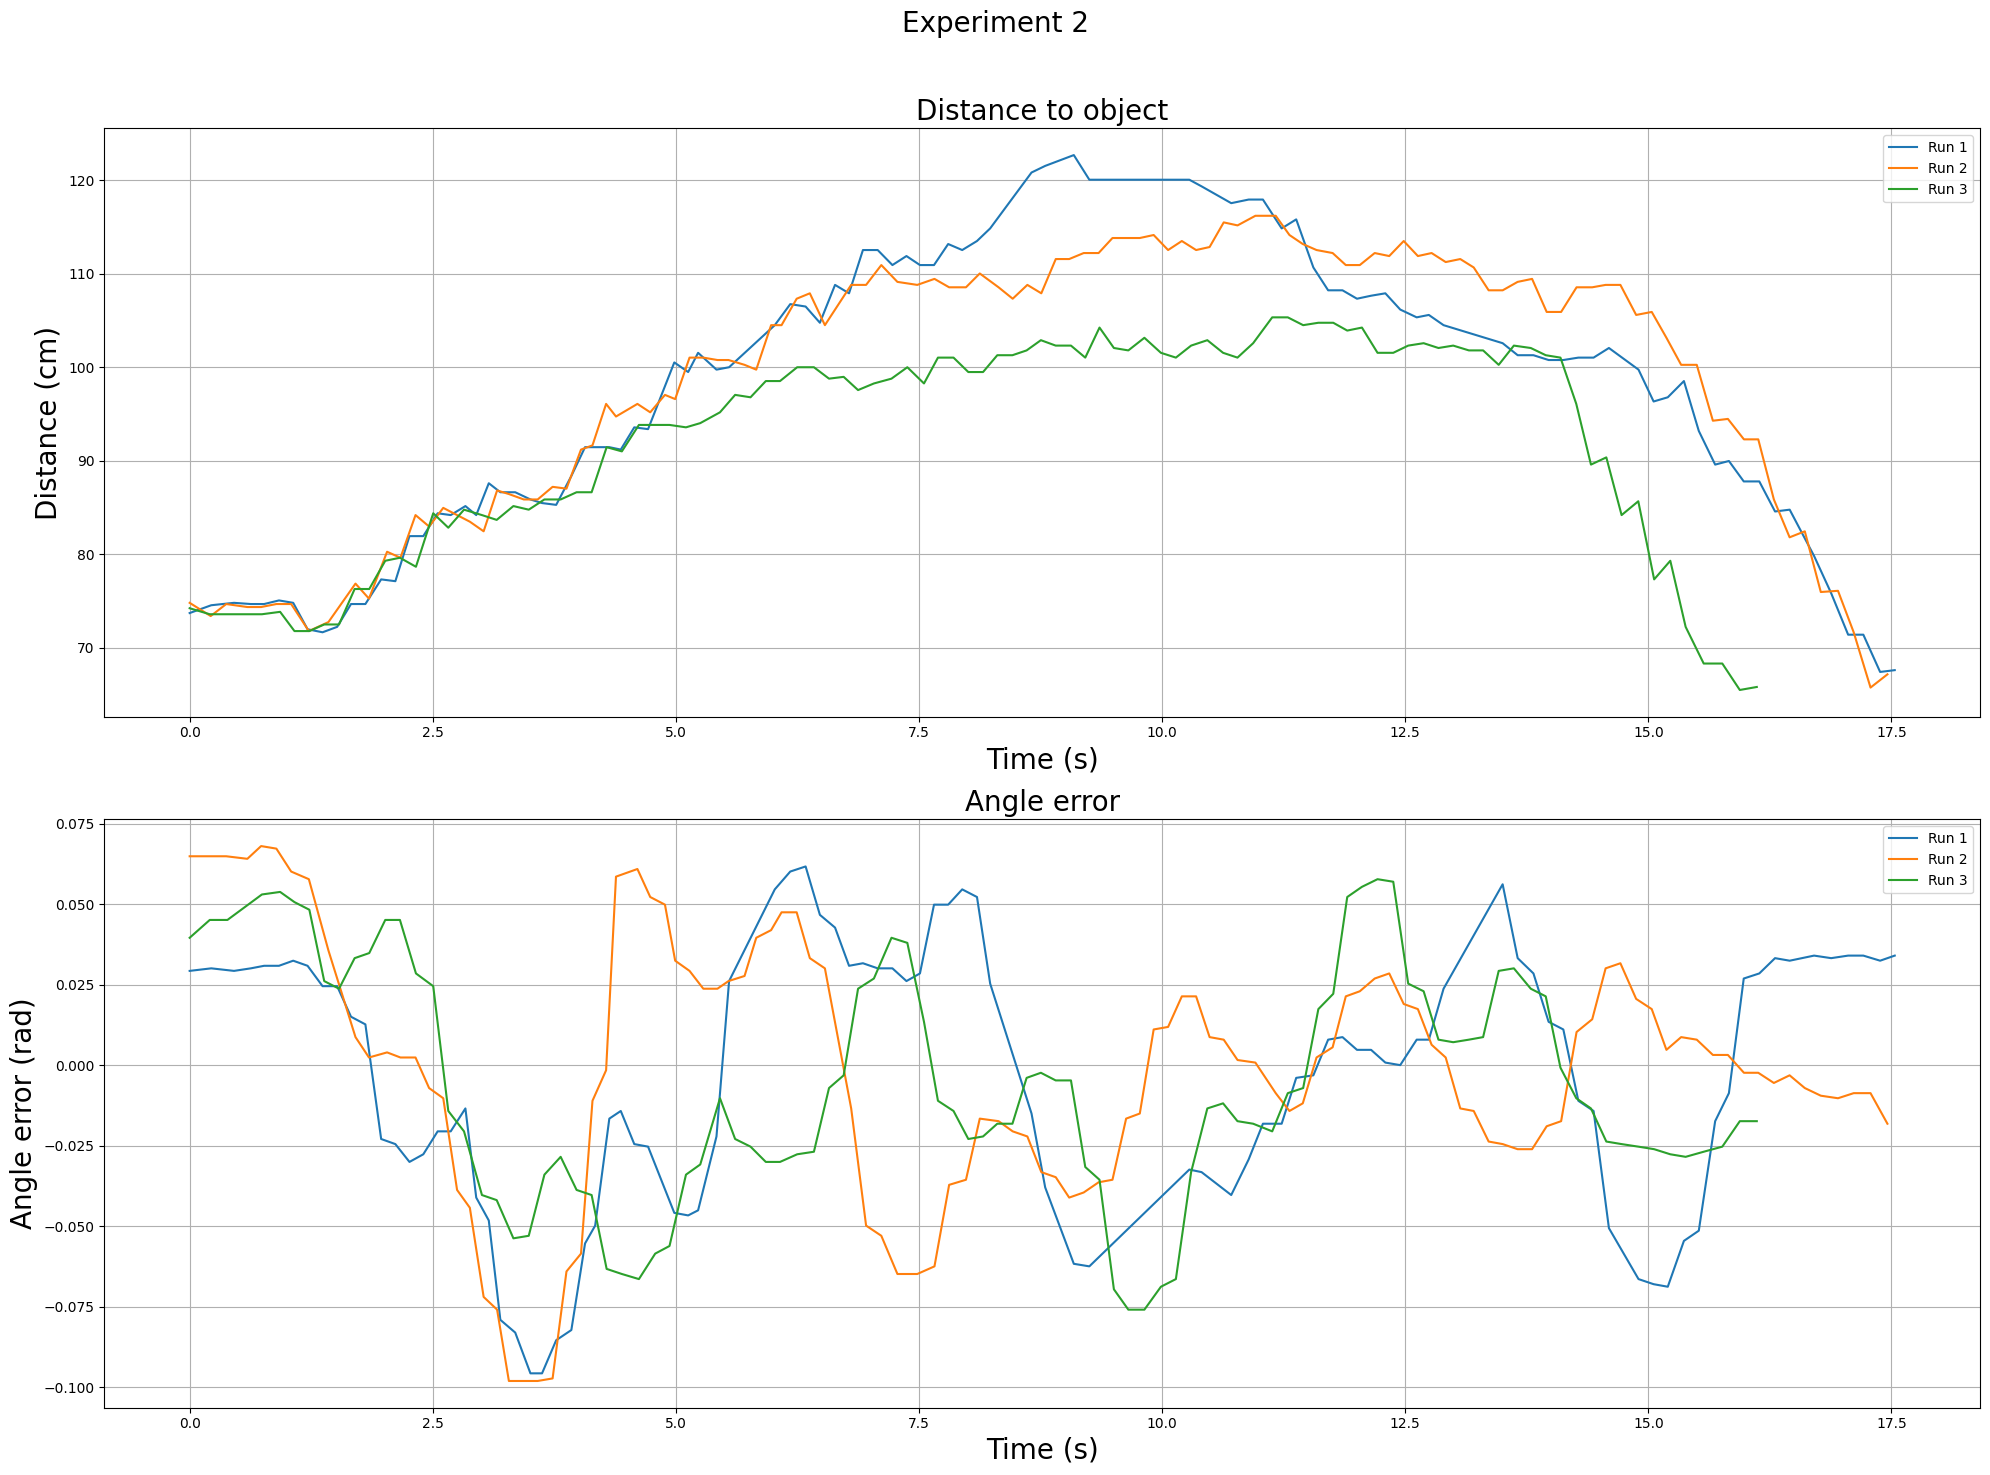

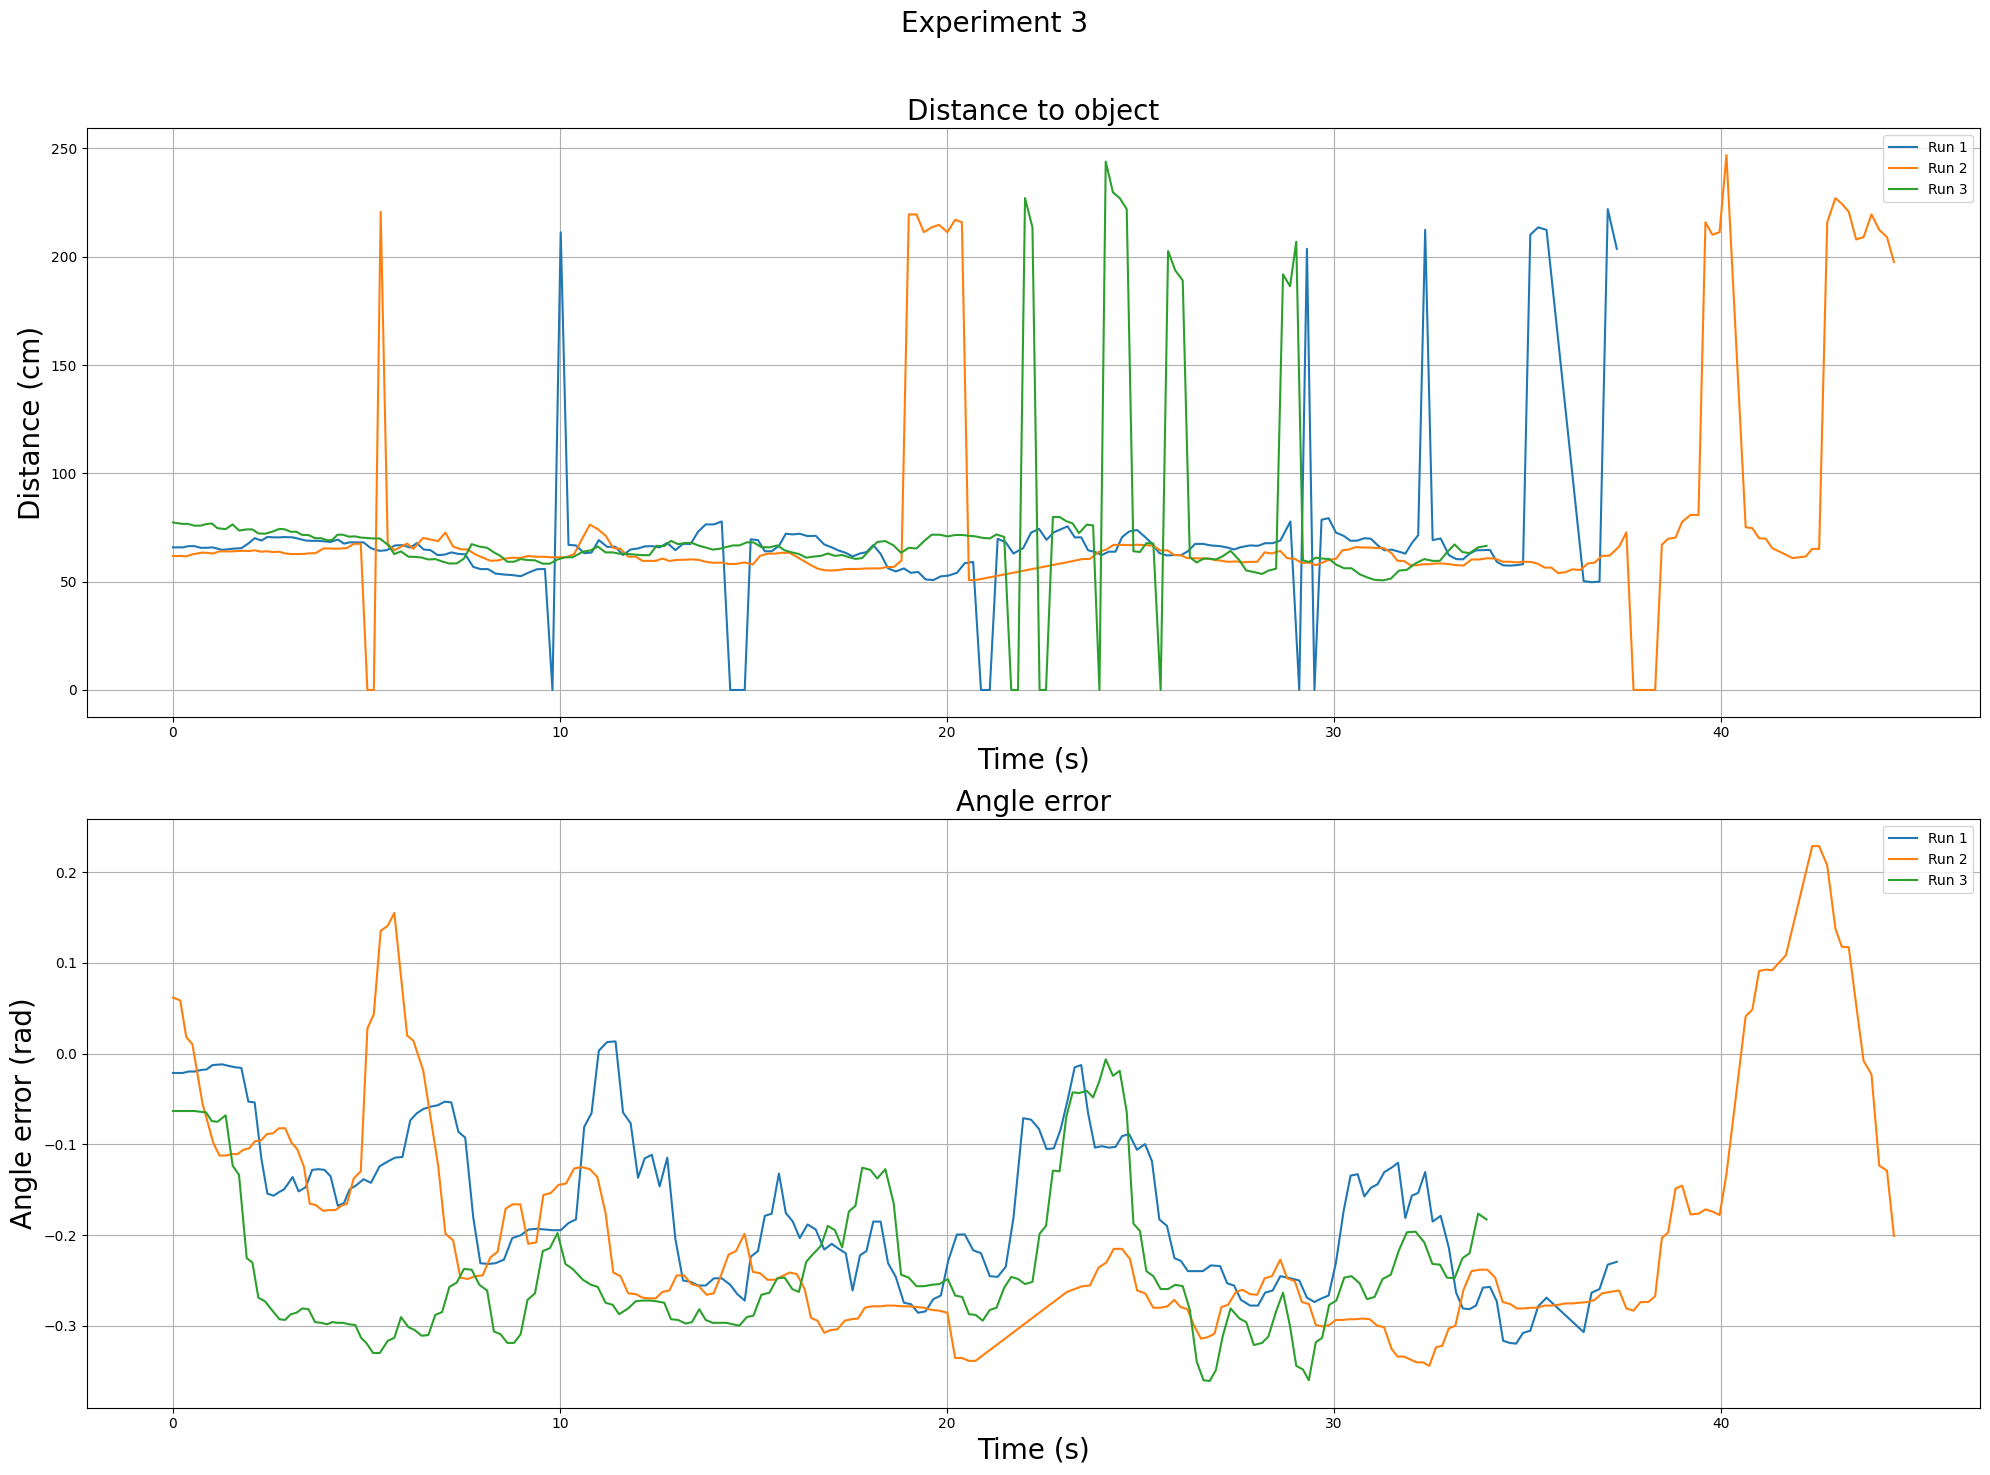

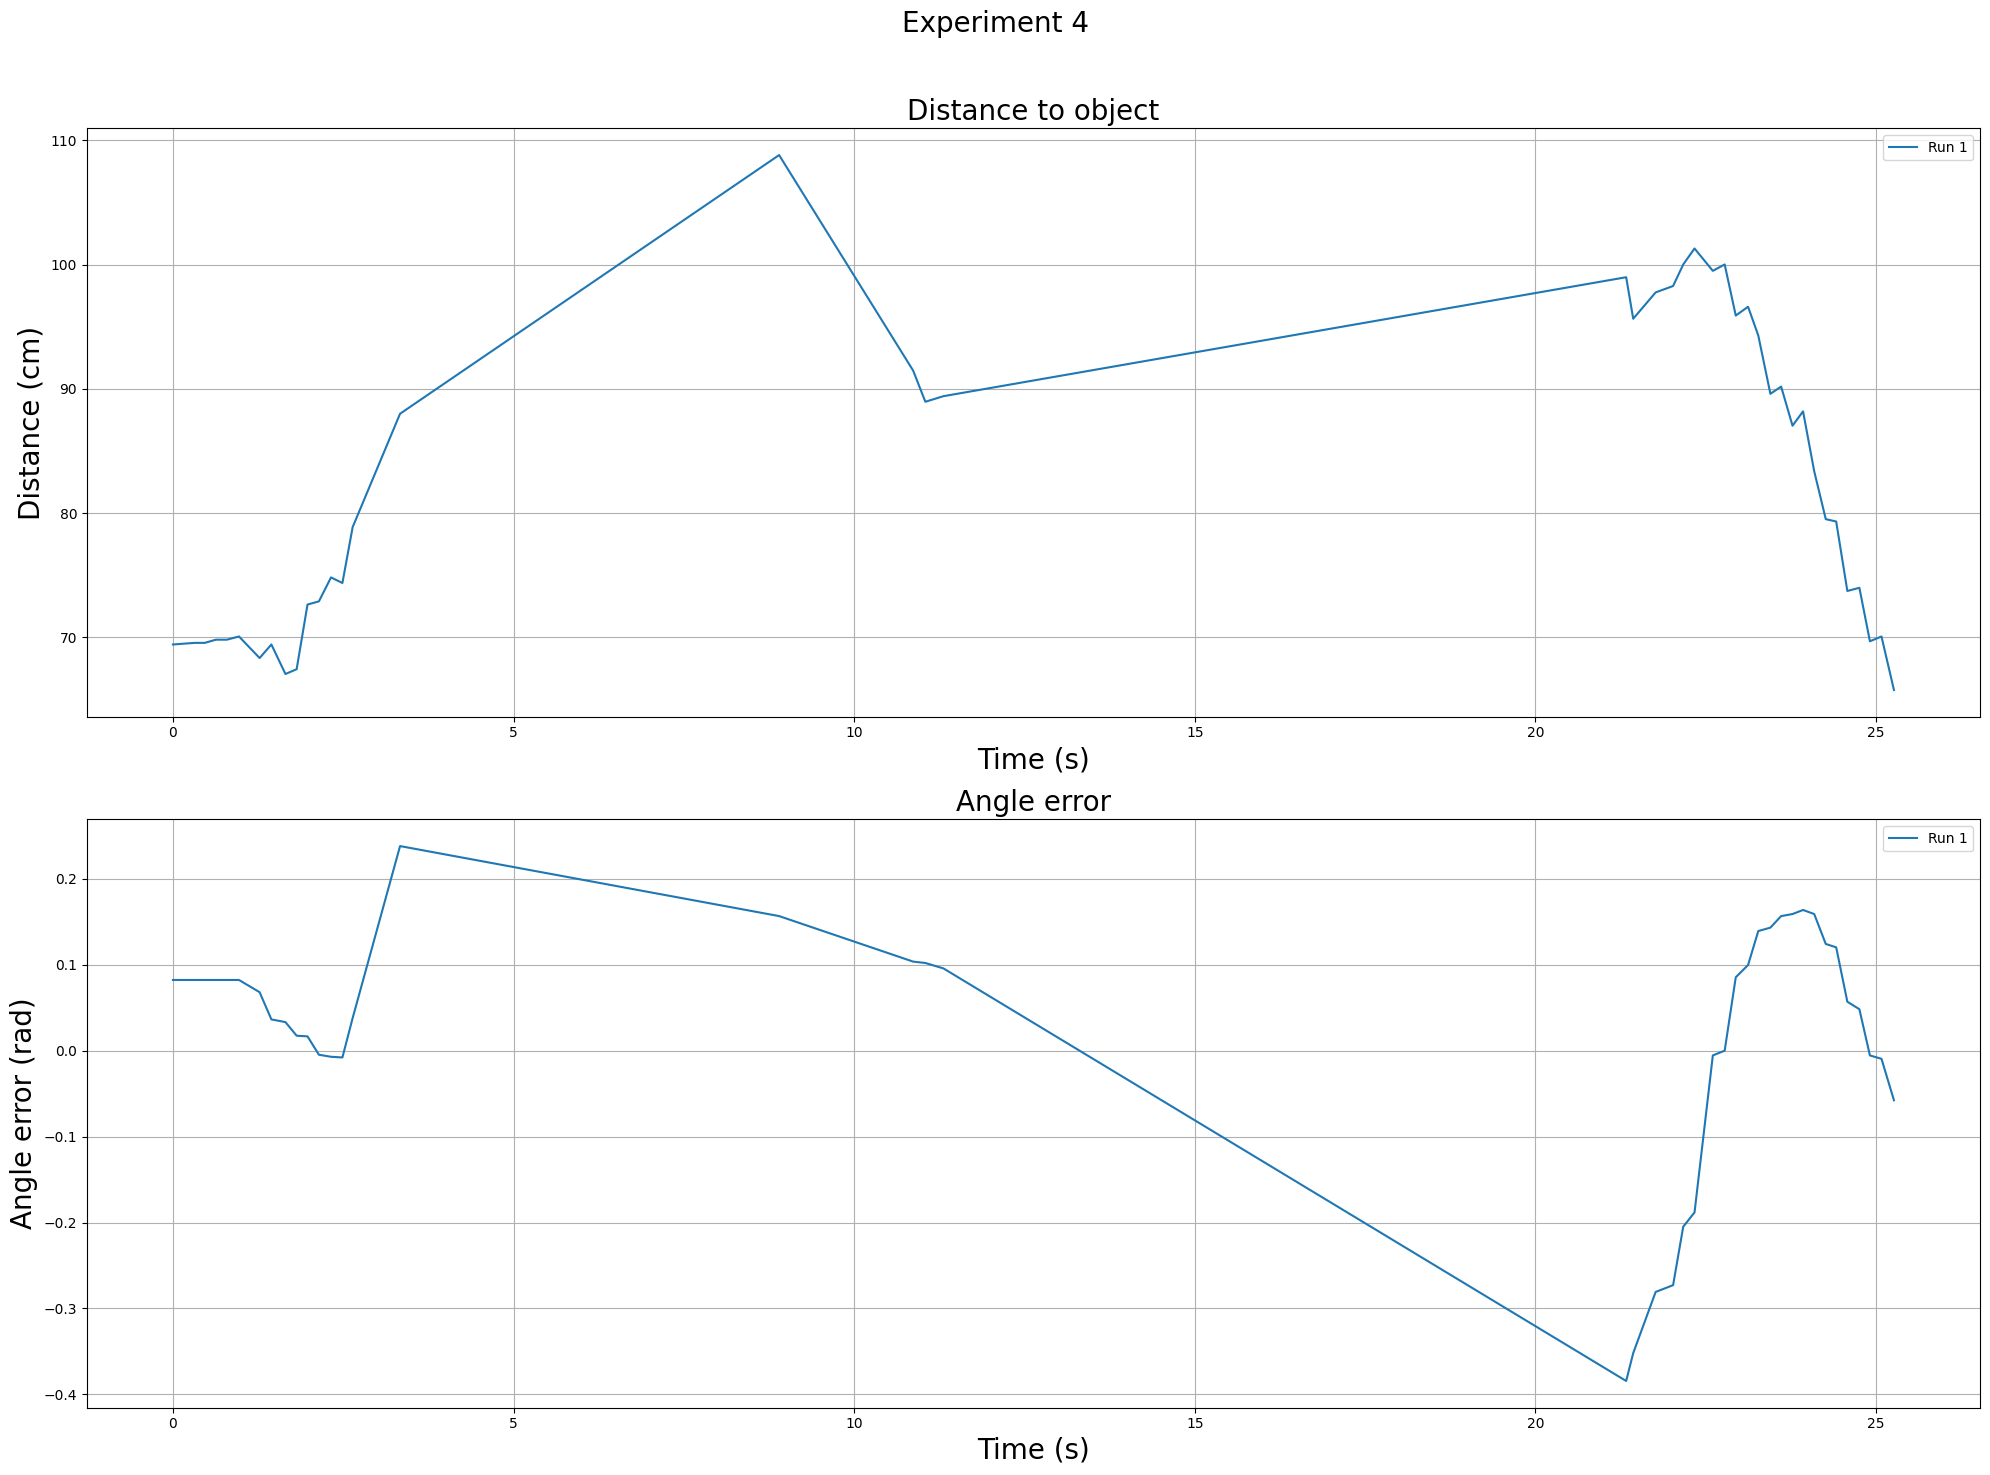

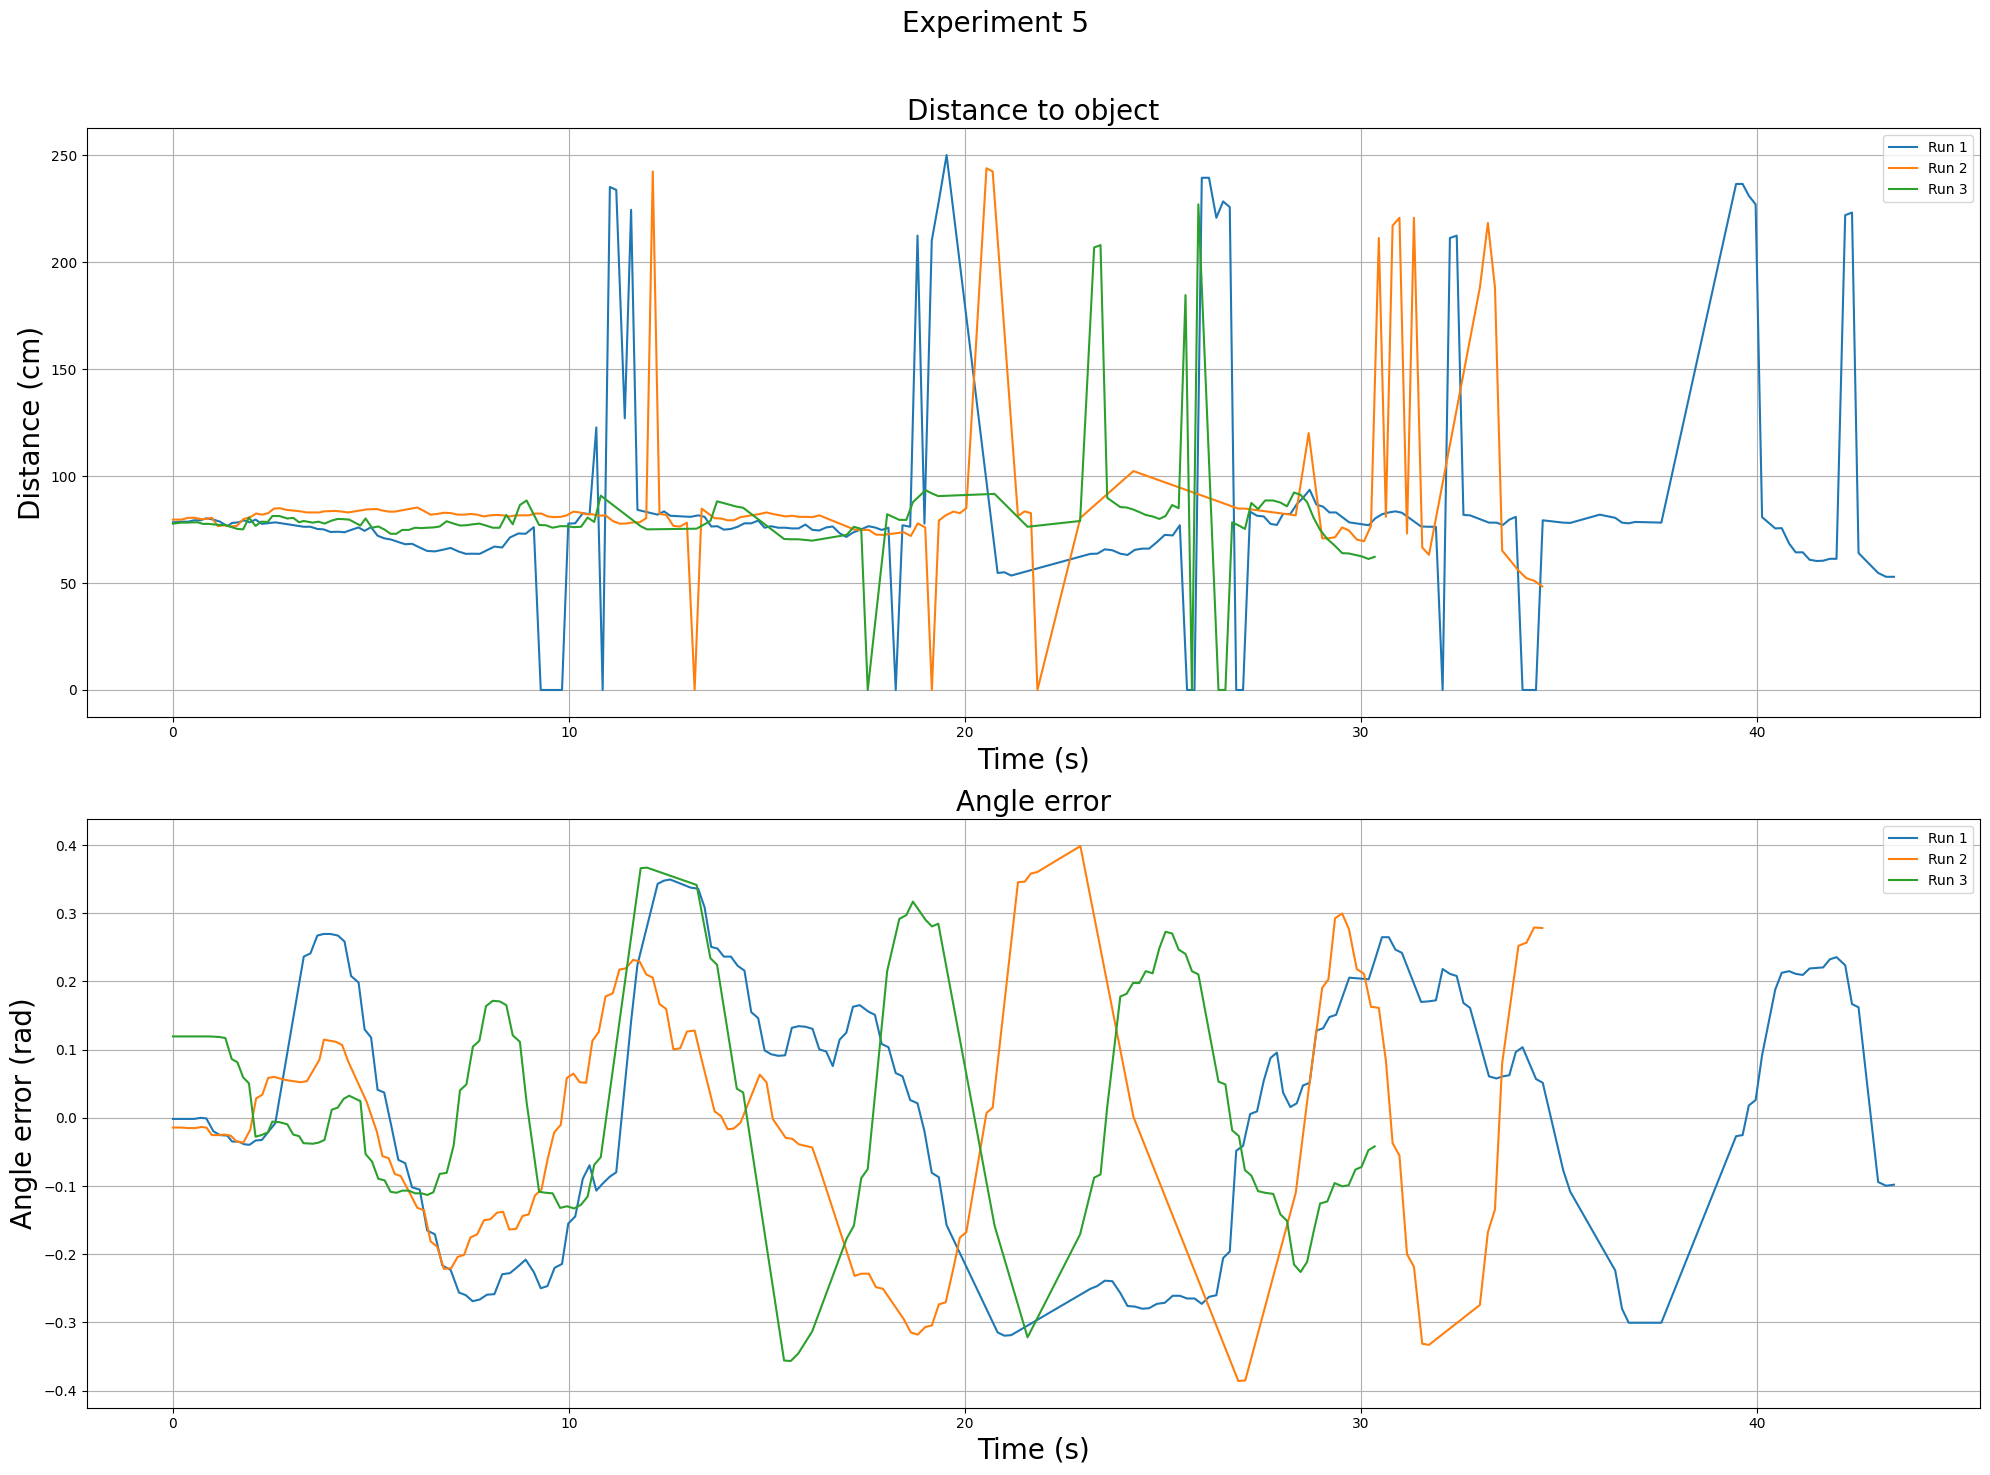

In [2]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

# Define font size
label_fontsize = 20

for exp in range(1, 6):
    path = f'Exp{exp}/'
    
    # Import all the pickle files in the folder
    filenames = os.listdir(path)
    data = []
    for filename in filenames:
        with open(path + filename, "rb") as f:
            data.append(pickle.load(f))
    
    # Create a single figure to contain the subplots in a 2x1 grid
    fig, axs = plt.subplots(2, 1, figsize=(20, 15))
    fig.suptitle(f'Experiment {exp}', fontsize=label_fontsize)

    # Plot Distance from object
    ax = axs[0]
    ax.set_title('Distance to object', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Distance (cm)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        dist_error = data[i]['distance_vec']
        ax.plot(time, dist_error, label=f'Run {i+1}')
    ax.legend()

    # Plot Angle error
    ax = axs[1]
    ax.set_title('Angle error', fontsize=label_fontsize)
    ax.set_xlabel('Time (s)', fontsize=label_fontsize)
    ax.set_ylabel('Angle error (rad)', fontsize=label_fontsize)
    ax.grid(True)
    
    for i in range(len(data)):
        time = np.array(data[i]['time'])
        time = time - time[0]
        angle_error = data[i]['angle_error_vec']
        ax.plot(time, angle_error, label=f'Run {i+1}')
    ax.legend()

    # Save the combined plot as an SVG file
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'Exp{exp}_combined.svg')
    plt.show()
